# 로지스틱 회귀분석(Logistic Regression)

- Regression은 관측치 $y$가 연속값을 가질 때 여러 Feature $(z_1, ..., z_{n_{_0}})$들 간의 관계를 설명하기 위해 도입된 이론임<br>


- 관측치  $y$가 연속값(Regression값)이 아니고 이산형 값일 때 잘 개발된 Regression 방법을 사용할 수 없을까?<br>
$ \ \ $ $\checkmark \ $ $y$가 이산형이라는 의미는 Classification문제를 다룰 수 있다는 것을 의미함<br><br>


<span style="color:red">
$$
\begin{align}
Logistic \ & Regressin \ \ Model \\\\
& Data \quad \left( z_i, y_i \right): z_i \in R^{n_{_0}}, y_i \in \{0, 1, ..., C \} \\\\
& 함수 \quad  \ \ f: z \in R^{n_{_0}} \ \Longrightarrow \ y \in {0, 1, ..., C} \\
& \qquad \qquad C \ := \ Class \ 수
\end{align}
$$
</span>

## 1. Logistic Regression의 개념
### 1.1 Bernoulli 분포

- Class가 2개인 Classification문제를 나타낼 수 있는 확률분포는 Bernoulli 분포임


-  Bernoulli 분포는 매 시행마다 오직 **2 가지의 가능한 결과**만 일어나는 상황, 즉 [0, 1], [성공, 실패]...와 같이 측정치가 2개 중의 하나로 나타나는 경우를 묘사하는 분포임<br>

$$
P(Y=y)=
\begin{cases}
p, & \ if \ y=1  \\\\
1-p, & \ if \ y=0
\end{cases}
$$


$ \quad $ $\checkmark \ $  위의 수식을 하나의 수식으로 표현하면 다음과 같음<br>

$$P(Y=y)=p^{y}(1-p)^{1-y}, y=0, 1$$<br>
$ \quad $ $\checkmark \ $ Bernoulli 분포는 parameter가 하나이고 $P(Y=1)$일 확률  $p$가 parameter임




### 1.2 Class의 수가 2개인 분류문제(Classification Problem)

#### (1) Logistic Regression 개요

- Linear Regression을 이용한 Classification문제를 다룸<br>
<br>
$ \ \ $ $(Step \ 1) \ $ Linear Regression을 수행<br>
<br>
$$
\begin{align}
& Linear \ Regression \ Model: \qquad \ \ y = w_0 + w_1 z_1 + w_2 z_2 + ... + + w_{n_0} z_{n_0} + \varepsilon \\\\
& 추정된 \ Linear \ Regression \ Model: \hat y = \hat w_0 + \hat w_1 z_1 + \hat w_2 z_2 + ... + \hat w_{n_0} z_{n_0}
\end{align}
$$
<br>
$ \ \ $ $(Step \ 2) \ $ Linear Regression 결과인 $\hat y$를 Sigmoid function을 이용하여 Classification을 수행함

#### (2) Sigmoid Function

- Sigmoid Function은 다음과 같은 함수임<br>
$ \ \ $ $\checkmark \ $ Input: $\hat y = z \hat w$ Regression 추정의 결과<br>
$ \ \ $ $\checkmark \ $ Output: Sigmoid function $\sigma()$의 결과값인 Class값

$$
\begin{align}
& Sigmoid \ Function: \ \sigma\\
& \qquad \sigma: \hat y \in R^{1} \Longrightarrow z \in (0, 1) \\\\
& \qquad z = \sigma \left( \hat y \right) = \frac{1}{1+ exp \left( - \ \hat y \right)}
\end{align}
$$

- Sigmoid function은 (0, 1)사이의 값을 가지는 bounded function임

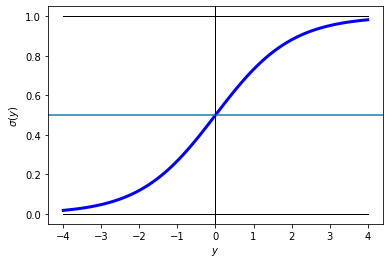

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x_set):
    return 1/(1+np.exp(-x_set))

x_set = np.linspace(-4, 4, 100)
zero = np.zeros(100)
one = np.ones(100)

plt.plot(x_set, sigmoid(x_set), color='blue', linewidth=3)
plt.plot(x_set, zero, color='k', linewidth=1)
plt.plot(x_set, one, color='k', linewidth=1)
plt.axhline(y=0.5, xmin=-4, xmax=4)
plt.axvline(x=0, ymin= -0.1, ymax=1.1, color='k', linewidth=1)
plt.ylabel('$\sigma(y)$ ')
plt.xlabel('$y$')
plt.show()

### 1.3 Logistic Regression 구현을 위한 Sigmoid Function의 활용

#### $\qquad$ $(Step 1)$ $y=Zw+\varepsilon$ Regression Model에 대해 $\ \ \ \hat w$과    $ \ \ \hat y=Z \hat w$를 추정
#### $\qquad$ $(Step 2)$ Sigmoid function $\ \ \ \sigma(\hat y)=\frac{1}{1+e^{- \hat y}}$을 이용하여   $\ \ \ \hat y$를 추정확률  $ \ \  \hat p$로 변환
#### $\qquad$ $(Step 3)$ 분류판정(Classification)

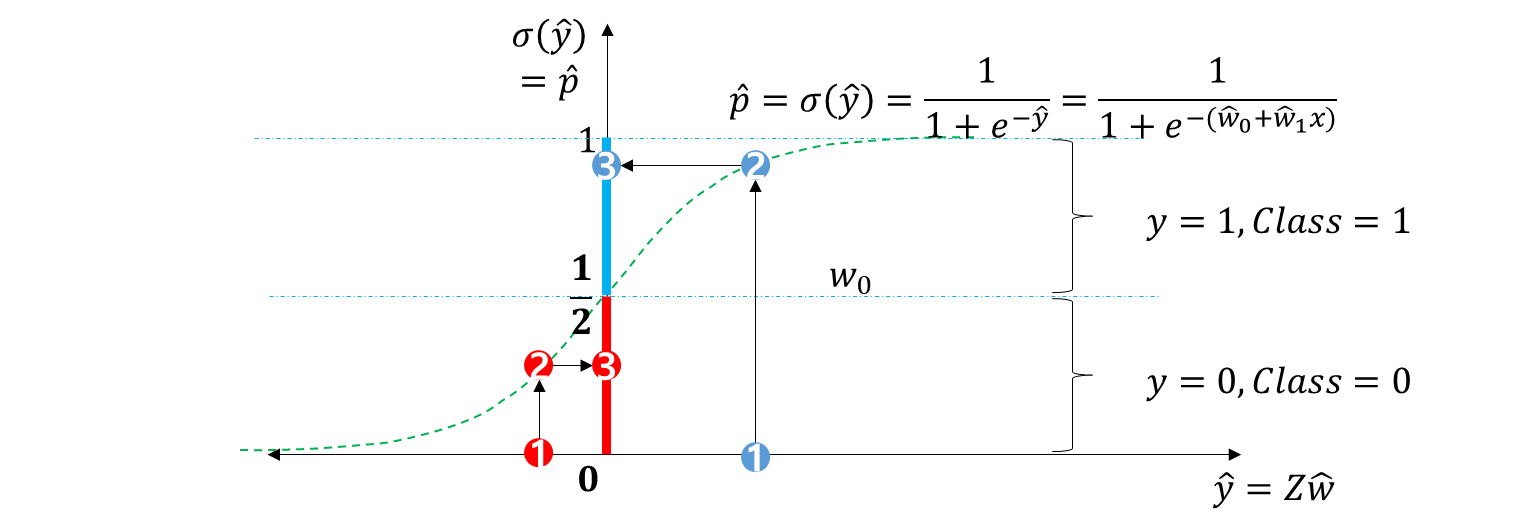

### [참고] 어떤 사건이 일어날 확률과 Sigmoid Function

- 확률변수 $Y$가 1값을 가지는 사건을 성공이라고 하자<br>
$ \ \ $ $\checkmark \ $ 성공의 확률: $P(Y=1)=p$<br> 
$ \ \ $ $\checkmark \ $ 실패할 확률: $P(Y=0)=1-p$


- <span style="color:red">odds ratio</span>는 성공의 확률을 실패할 확률로 나눈 것을 말함

$$
odds = \frac{p}{1-p}
$$


- <span style="color:red">logit</span>은 어떤 확률 $p$의  $odds$에 $log$를 취한 값임

$$ 
\begin{align}
logit(p) &= log(odds) = log \left( \frac{p}{1-p} \right) \\
         &= log(p)-log(1-p)=-log\left(  \frac{1}{p}- 1 \right)
\end{align}
$$


- <span style="color:red"> Logistic Function</span>은 inverse-logit으로 정의 됨<br>
$ \ \ $ $\checkmark \ $ 성공확률 $p$에 대한 logit함수 적용결과 값을 $y$라고 하자. 그러면 다음 관계가 성립함
<br>
$$  
y = logit(p) = log \left( \frac{p}{1-p} \right) 
$$
<br>
$ \ \ $ $\checkmark \ $ 우리가 구해야하는 식은 inverse-logit(logit function의 역함수)을 구해야하므로, 윗식의 양변에 <br> $\quad \ \ $ 자연대수  승을 취하면<br>
<br>
$$ 
\begin{align}
& e^{y} = \frac{p}{1-p} \\
& e^{y} - p e^{y} = p \\
& p= \frac{e^y}{1+e^y}
\end{align}
$$

-  <span style="color:red">Sigmoid Function</span>은 $logit$ function의 역함수임<br>

$$
\begin{align}
\sigma \left( \hat y \right) &= logit^{-1} \left( \hat y \right) \\
            &= \frac{e^{\hat y}}{1+e^{\hat y}} \\
            &= \frac{1}{1+e^{-{\hat y}}}
\end{align}
$$

## 2. Classification의 성능평가

### 2.1 성능평가항목

- Logistic Regression Model이 Classification을  잘 수행했는지 판단하기 위한 Measure<br>


- 다음 Table은 다음과 같음<br>
$ \ \ $ (i) 행: 관측된 사실(참값임) <br>
$ \ \ $ (ii) 열: Logistic Regression Model의 예측값 <br>


- Naming Rule<br>

$$
Name = (True \ or \ False) \ + \ (Predicted \ Value)
$$

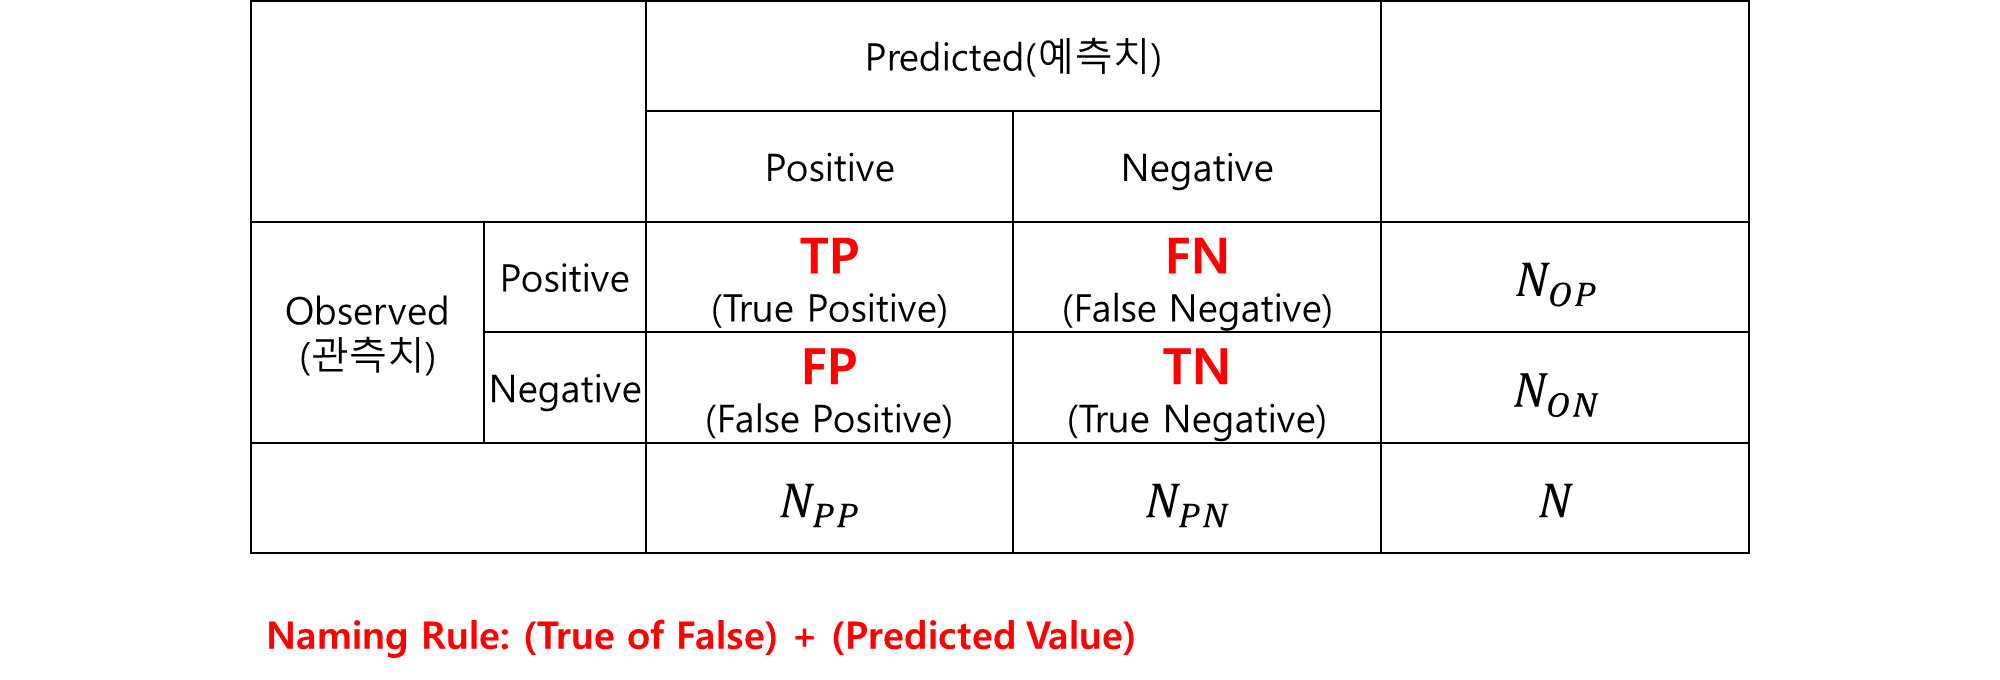

- Classification의 핵심 Measure는 <span style="color:red">Accuracy, Precision, Recall</span>임<br>
$ \ \ $ $\checkmark \ $ 다른 Measure는 Accuracy, Precision, Recall로 만들어질 수 있음


 평가항목 | 중요도 | 수식 | $\qquad \qquad$ 설명
 :----: | :----: | :----: | :----
 𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 <br> (정확도) |  $\blacksquare$ | $ \frac{TP+TN}{N}$  | $\bullet \ $ 전체 데이타중에서, 제대로 분류된 데이타의 비율
𝐸𝑟𝑟𝑜𝑟 𝑅𝑎𝑡𝑒 | - | $ \frac{FN+FP}{N}$ |  $\bullet \ $ 전체 데이타중에서,  잘못  분류된  데이타의 비율
𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛<br> (정밀도) |   $\blacksquare$ | $ \frac{TP}{N_{PP}}$ |  $\bullet \ $ 우리가 개발한 Model(Classifier)을 이용하여   <br> $ \ \ $ Prediction한 결과 중 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒로 분류한 데이터 중  <br> $ \ \ $  제대로 분류된  Positive 수의 비율
𝑅𝑒𝑐𝑎𝑙𝑙<br> (재현율) |   $\blacksquare$ | $ \frac{TP}{N_{OP}}=\frac{TP}{TP+FN}$  |  $\bullet \ $ 실제 data 중에서 Positive인 data 중에서   <br> $ \ \ $ Positive로 제대로 분류된(예측된) data의 비율
𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦<br>(𝑇𝑟𝑢𝑒 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒 𝑅𝑎𝑡𝑒) | - | $ \frac{TN}{N_{PN}}=\frac{TN}{FN+TN}$  |  $\bullet \ $ Negative로 판단한 것 중에서 실제 Negative 수의  <br> $ \ \ $ 비율
𝑭−𝒎𝒆𝒂𝒔𝒖𝒓𝒆 | $\Box$ |  $$F_1 = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}}$$ |  $\bullet \ $ 𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛과  𝑅𝑒𝑐𝑎𝑙𝑙의 조화평균
$F_{\alpha}$ |  $\Box$ |  $$F_\alpha = \frac{1}{\frac{\alpha}{Recall} + \frac{(1-\alpha)}{Precision}}$$ |  $\bullet \ $ 정밀도와 재현율의 가중조화평균
𝐹𝑎𝑙𝑠𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒 𝑅𝑎𝑡𝑒 | - |  $ \frac{FN}{N_{OP}}=\frac{FN}{TP+FN}$  |  $\bullet \ $ 원래는 Positive인데 Negative로 잘못 판단한 비율 
$ROC$ |  $\Box$ | 세로: Recall <br> 가로: FP Rate (Specificity) |  $\bullet \ $ ROC 그래프는 가로축을 FP Rate (Specificity) 값의 <br> $ \ \ $ 비율로 하고 세로축을 TP Rate (Sensitive) 로 하여 <br> $ \ \ $ 시각화 한 그래프
𝑷𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏 𝑹𝒆𝒄𝒂𝒍𝒍 𝑷𝒍𝒐𝒕(𝑷𝑹) |  $\Box$ | 세로: Precision<br> 가로: Recall |  $\bullet \ $ PR은 데이타 라벨의 분포가 심하게 불균등 할 때  <br> $ \ \ $ 사용하고 $X$ 축을 Recall 값을, $Y$축을 Precision  <br> $ \ \ $ 값을 사용

### 2.2 오차행렬(Confusion Matrix)

- Confusion matrix $C$는 다음과 같이 정의된 행렬임<br>

$\qquad \qquad $ $ C_{i, j}  \ =$   참인  class가 $i$일 때, $j$ 라고   판정한   횟수


- 행렬 $C$의 diagonal 값은 True인 경우의 수이고 off-diagonal은 False인 경우의 수임

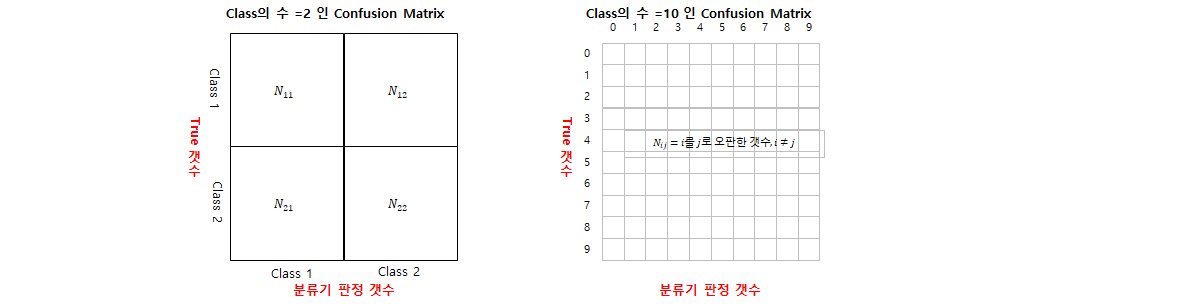

## 3. Logistic Regression 분석 예

#### Step 1: Import Packages, Functions, and Classes

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Step 2: Get Data

In [66]:
X, y = make_classification(n_samples=100, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, class_sep=2.0, 
                           random_state=101)
print(X.shape, y.shape)

(100, 2) (100,)


In [67]:
#print(X[:,0])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=0.33, random_state=101)

In [69]:
print(y_test.dtype, y_test.shape)

float64 (33,)


In [70]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

#### Step 3: Create a Model and Train It

In [71]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

In [72]:
print(regr.intercept_, regr.coef_)

0.5428543266020318 [ 0.02216363 -0.21266527]


##### 추정된 Linear Regression Model 
$ 
\begin{align}
\qquad \qquad \hat y &= \hat w_0 + \hat w_1 z_1 + \hat w_2 z_2 \\
                    &= 0.543 + 0.022z_1 -0.213 z_2
\end{align}
$

##### Sigmoid Function을 이용한 Class의 판정

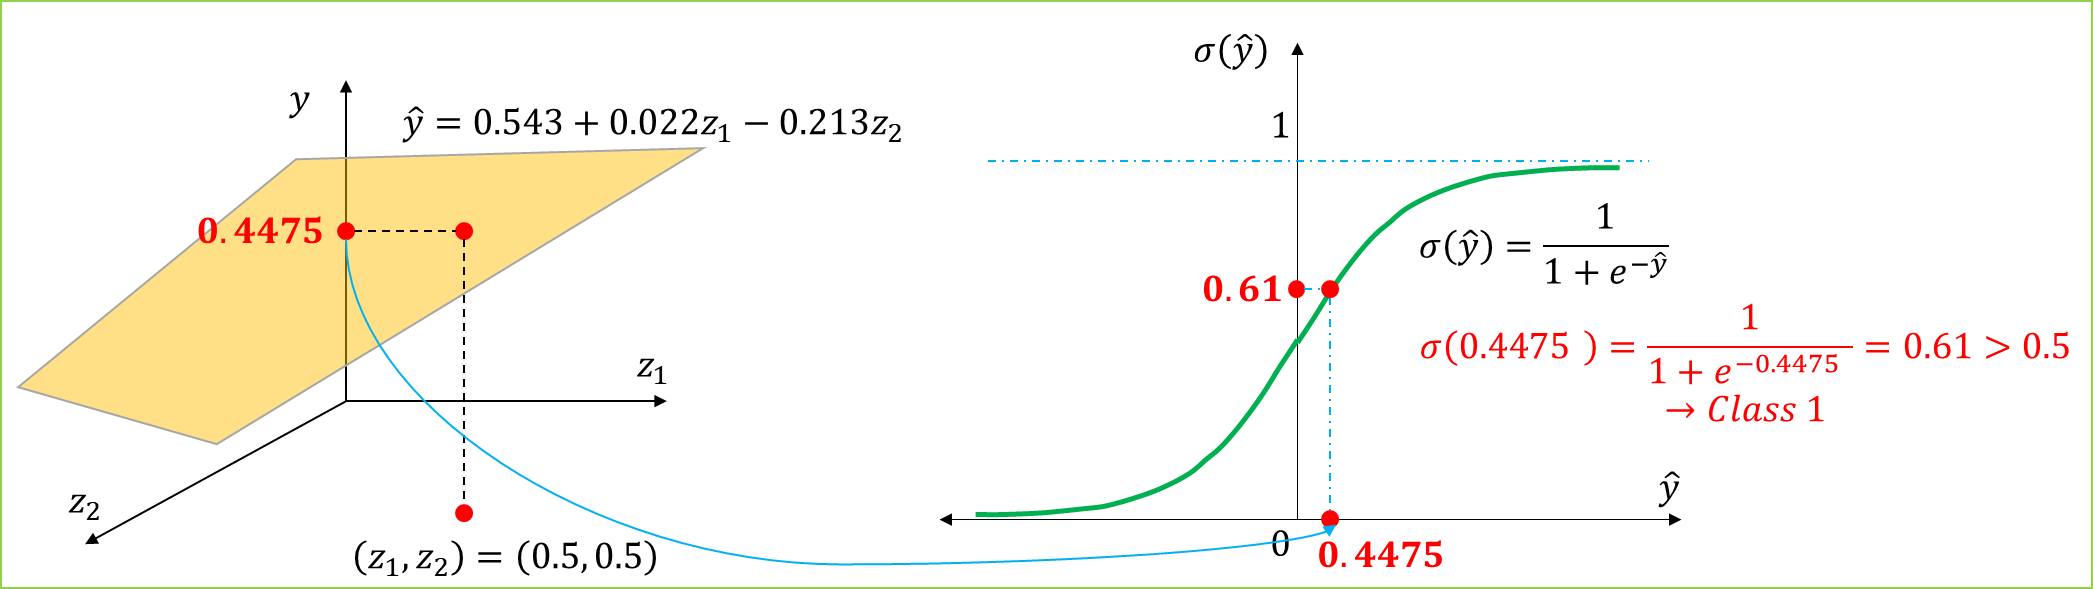

- Linear Regression Model의 $y \in R^1$임
- 우리가 구하려고 하는 것은 Classification문제임

#### Step 4: Logistic Regression Model

- 분석할 Model을 선택하여 객체생성

In [73]:
clf = LogisticRegression()

- dataset을 이용하여 Model을 학습

In [74]:
clf.fit(X_train, y_train.astype(int))

LogisticRegression()

#### Step 5: Evaluate the Model
- test dataset $X\_{test \ dataset}$을 학습된 Model에 입력하여 값을 예측  $\hat y$ 

In [75]:
y_clf = clf.predict(X_test)

- $X\_{test \ dataset}$에서 예측치 $\hat y$와 test dataset의 label $y$을 비교하여 학습된 Model의 성능을 평가<br>
$ \ \ $ $\checkmark \ $ $y$는 Label이라 부르고 관측된 정답값임<br>
$ \ \ $ $\checkmark \ $ $\hat y$ 는 $X\_{train \ dataset}$을 이용하여 학습시킨 model에 $X\_{test \ dataset}$를 대입하여 예측한 예측치임

In [76]:
accuracy = np.sum(y_test == y_clf)/len(y_test)
print('accuracy: {:.3f}'.format(accuracy))

accuracy: 0.970


In [77]:
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



###  연습 1: scikit-learn을 이용한 Logistic Regression 연습 

#### Step 1: Import Packages, Functions, and Classes

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Step 2: Get Data

In [79]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

#### Step 3: Create a Model and Train It

In [80]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [81]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [82]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [83]:
model.classes_

array([0, 1])

In [84]:
model.intercept_

array([-1.04608067])

In [85]:
model.coef_

array([[0.51491375]])

#### Step 4: Evaluate the Model

In [86]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [87]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

- model.score(x, y)는 전체 관측치 중에서 제대로 예측한 수의 비율

In [88]:
model.score(x, y)

0.9

In [89]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

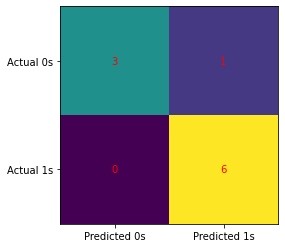

In [90]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [91]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



### 연습 2: scikit-learn을 이용한 Logistic Regression 연습

#### Step 1: Import Packages, Functions, and Classes

In [92]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Step 2: Get Data

In [93]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1]))

#### Step 3: Create a Model and Train It

In [94]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [95]:
model.classes_

array([0, 1])

In [96]:
model.intercept_

array([-1.51632619])

In [97]:
model.coef_

array([[0.703457]])

#### Step 4: Evaluate the Model

In [98]:
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

- Class 0에 속할 확률과 Class 1에 속할 확률을 각각 계산

In [99]:
print('p_pred:', p_pred, sep='\n', end='\n\n')  

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]



In [100]:
print('y_pred:', y_pred, end='\n\n')

y_pred: [0 0 0 1 1 1 1 1 1 1]



In [101]:
print('score_:', score_, end='\n\n')

score_: 0.8



In [102]:
print('conf_m:', conf_m, sep='\n', end='\n\n')

conf_m:
[[2 1]
 [1 6]]



In [103]:
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



### 연습 3: StatsModels을 이용한 Logistic Regression 연습

#### Step 1: Import Packages, Functions, and Classes

In [104]:
import numpy as np
import statsmodels.api as sm

#### Step 2: Get Data

In [105]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)
x, y

(array([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.],
        [1., 8.],
        [1., 9.]]),
 array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1]))

#### Step 3: Create a Model and Train It

In [106]:
model = sm.Logit(y, x)

In [107]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [108]:
result.params

array([-1.972805  ,  0.82240094])

#### Step 4: Evaluate the Model

In [109]:
result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [110]:
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [111]:
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [112]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                  0.4263
Time:                        17:11:02   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

### 연습 4: Handwriting Recognition에 대한 Logistic Regression 연습

#### Step 1: Import Packages, Functions, and Classes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Step 2: Get Data

In [2]:
x, y = load_digits(return_X_y=True)

In [3]:
x, x.shape   ## MNIST 8x8 image

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 (1797, 64))

##### Step 2b: Split Data

In [4]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

##### Step 2c: Scale Data

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

#### Step 3: Create a Model and Train It

In [6]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [7]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
model.intercept_

array([-2.73645761, -2.77774361, -2.74028598, -2.72221436, -2.70234208,
       -2.7232237 , -2.79949725, -2.74590013, -2.63851341, -2.75679358])

In [121]:
model.coef_

array([[ 0.00000000e+00, -2.27680531e-02, -1.05198103e-02,
         1.49272422e-01, -8.08210879e-02, -2.49747653e-01,
        -5.14325206e-02, -5.45056683e-03, -2.32032737e-03,
        -1.25447504e-01,  3.24463204e-02,  1.02987845e-01,
         3.08882350e-01,  3.10625812e-01, -4.08016176e-02,
        -1.34743379e-02,  1.08159828e-02,  7.79920142e-02,
        -2.55957154e-02, -7.22962220e-03, -1.66787374e-01,
         3.37966750e-01,  5.94210751e-02, -2.43160281e-02,
         1.77634770e-02,  1.80673248e-01,  9.67450831e-03,
        -2.68433227e-01, -4.95389929e-01, -1.28902641e-01,
         1.70026784e-01, -2.89743863e-03,  0.00000000e+00,
         1.45614546e-01,  1.70908304e-01, -3.15761191e-01,
        -3.69687449e-01, -1.86967353e-01,  1.56212150e-01,
         0.00000000e+00, -1.93245767e-02, -1.05328652e-01,
         3.66928484e-01, -3.37811635e-01, -3.43997894e-01,
         8.04630692e-03,  9.36489204e-03,  2.45574216e-03,
        -2.34168093e-02, -1.60434709e-01,  2.20981289e-0

#### Step 4: Evaluate the Model

In [122]:
x_test = scaler.transform(x_test)

In [123]:
y_pred = model.predict(x_test)

In [124]:
model.score(x_train, y_train)

0.964509394572025

In [125]:
model.score(x_test, y_test)

0.9416666666666667

In [126]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

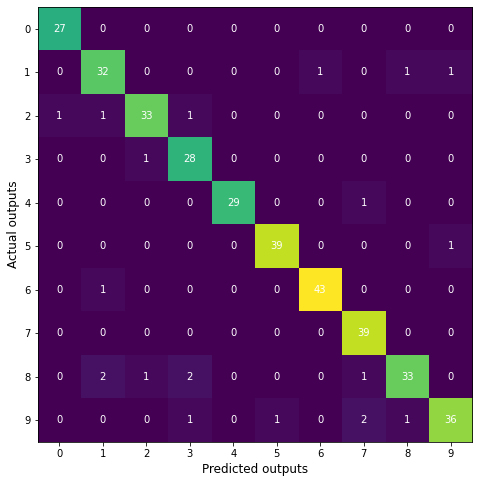

In [127]:
cm = confusion_matrix(y_test, y_pred)
font_size = 12

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [128]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

